In [366]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import scipy as sc
import os
import seaborn as sns
import statsmodels.api as sm
sns.set()
import warnings
import itertools
from scipy import stats
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
size = 18
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,7),
          'axes.labelsize': size * 0.8,
          'axes.titlesize': size * 0.95,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}

plt.rcParams.update(params)

In [2]:
os.chdir(os.getcwd() + "/Data Extraction/Data")

In [3]:
def Returns(alpha, stock_returns):
    
    '''
    Dimensions: 

    alpha = [N, T]
    stock_returns = [N, T]
    
    '''

    N, T = alpha.shape 
    Portfolio_Daily_Returns = np.zeros((T))
    alpha = alpha.transpose()
    stock_returns = stock_returns.transpose()
    
    for i in range(T):

        Portfolio_Daily_Returns[i] = np.dot(alpha[i], stock_returns[i])
    
    return Portfolio_Daily_Returns

In [4]:
def Variance(alpha, stock_returns):
    
    '''
    Dimensions: 

    alpha = [N, T]
    stock_returns = [N, T]
    
    '''
    
    N, T = alpha.shape 
    Portfolio_Daily_Variance = np.ones((T))
    alpha = alpha.transpose()
    stock_returns = stock_returns.transpose()
    
    for i in range(T):
         
        #print (np.cov(stock_returns[i], ddof = 1))    
        #print ((stock_returns[i])) 
        Portfolio_Daily_Variance[i] = np.dot(np.multiply(alpha[i], np.cov(stock_returns[i], ddof = 1)), alpha[i].transpose())
        
        
    #print (Portfolio_Daily_Variance)
    return Portfolio_Daily_Variance
        

In [5]:
def Sharpe(alpha, stock_returns, r = 0.0):

    '''
    Dimensions: 

    alpha = [N, T]
    stock_returns = [N, T]
    
    '''

    Portfolio_Daily_Returns = Returns(alpha, stock_returns)
    Portfolio_Daily_Variance = Variance(alpha, stock_returns)
    Portfolio_Daily_Sharpe = (Portfolio_Daily_Returns - r)/np.sqrt(Portfolio_Daily_Variance)
    
    return Portfolio_Daily_Sharpe

In [393]:
data = pd.read_csv("returns.csv")
date = data["Date"]
data = data.drop(columns = ["Date"])

In [394]:
data = data[-5000: ]
data = data.fillna(method = "backfill")
alpha = data

In [395]:
df = data.to_numpy()

In [396]:
data = df
data = data.transpose()

In [397]:
n, T = data.shape

In [398]:
#- alpha.rolling(7).mean()

In [399]:
#Alpha Strategies
#alpha = (alpha.rolling(5).mean() - alpha.rolling(30).mean()).fillna(method = "backfill").to_numpy()
alpha = -alpha.shift(-1).fillna(method = "backfill").to_numpy()

In [416]:
alpha = stats.zscore(alpha, axis = 1)

In [417]:
alpha.shape

(5000, 23)

In [418]:
alpha = alpha.transpose()

In [419]:
alpha.shape

(23, 5000)

In [425]:
alpha = np.ones((n, T)) * (1/n)
Daily_Returns = Returns(alpha, data)
Daily_Variance = Variance(alpha, data)
Daily_Sharpe = Sharpe(alpha, data)


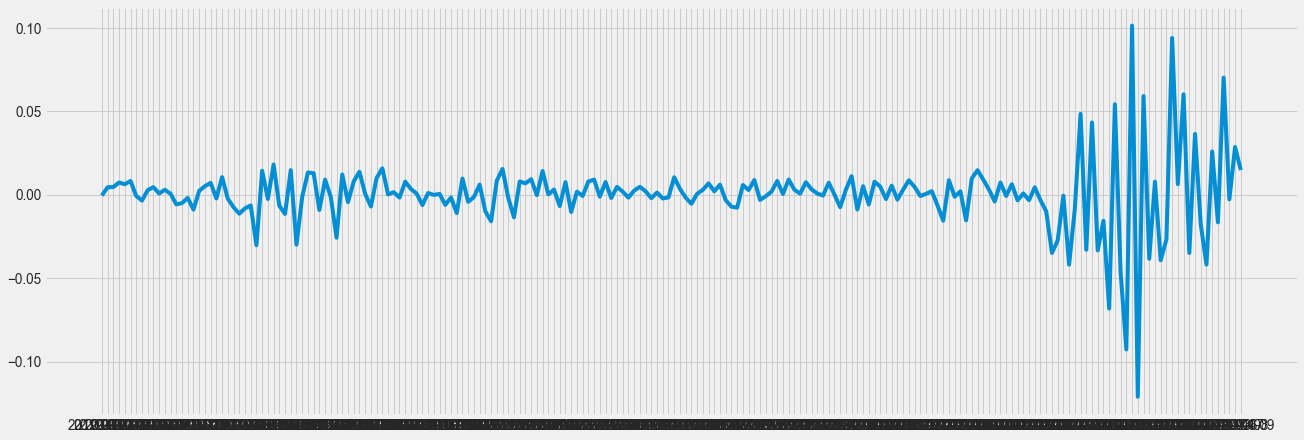

In [426]:
plt.plot(date[-200:], Daily_Returns[-200:])
plt.show()

In [427]:
Cumulative_Returns = (1 + Daily_Returns).cumprod()

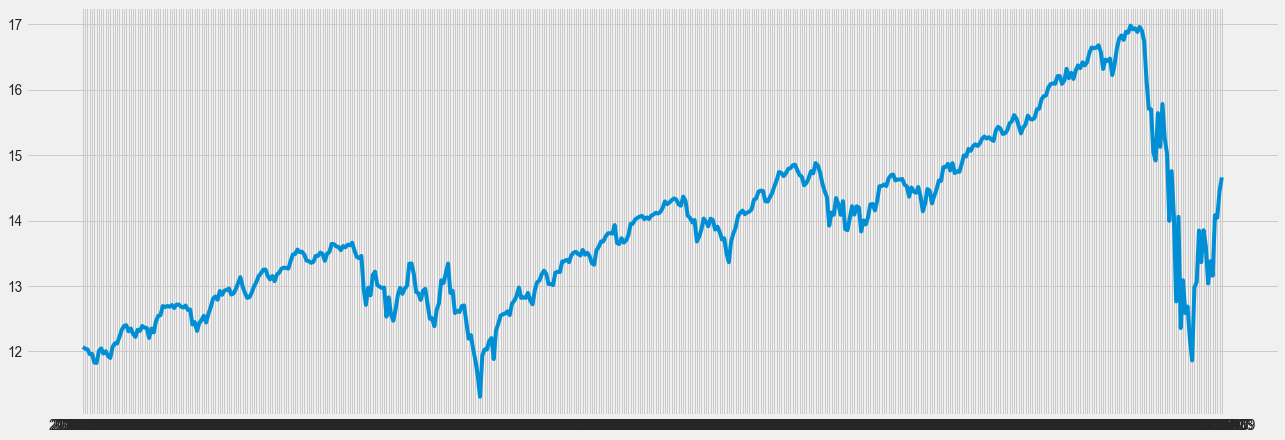

In [428]:
plt.plot(date[-500:], Cumulative_Returns[-500:])
plt.show()

In [429]:
Cumulative_Returns

array([ 1.00657061,  1.03079517,  1.02803932, ..., 14.04332689,
       14.44568085, 14.660059  ])